In [1]:
#imports library
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import datetime
import numpy as np
from pandas import read_json
from pandas import read_csv
from numpy import array
import matplotlib.colors as colors
import matplotlib.cm as cm
from pylab import rcParams
import warnings
import itertools
from pandas import Series
#plt.style.use('fivethirtyeight')
plt.style.use('classic')
%matplotlib inline

/tmp/ipykernel_7469/65198588.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 1000)

In [3]:
df0 = pd.read_json('https://oilspillmonitor.ng/api/spill-data.php?dataset=nosdra&format=json')

In [5]:
df0.shape

(15895, 42)

In [6]:
df1 = df0.loc[df0['status'].isin(['confirmed', 'reviewed'])]

In [8]:
df1.replace(to_replace = '20014-07-08', value = '2014-07-08', inplace = True) #Replaces a typograpical error

/home/nkem/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [9]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.reportdate

/home/nkem/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.formadate

In [11]:
df1.loc[pd.isnull(df1['incidentdate']), 'incidentdate'] = df1.jivdate

In [12]:
df1.incidentdate.isna().sum()

370

In [13]:
df2 = df1.filter(items=['company','incidentdate','contaminant','estimatedquantity','spillareahabitat','cause'])

In [14]:
df2.estimatedquantity.dtypes

dtype('O')

In [15]:
df2.estimatedquantity.describe()

count     9827
unique    1761
top          1
freq       539
Name: estimatedquantity, dtype: object

In [16]:
df2.estimatedquantity.isna().sum()

5510

In [18]:
dfnx3 = df2.copy()

In [19]:
#Changes commas after leading zeros to point
dfnx3.loc[dfnx3['estimatedquantity'].str.startswith('0', na=False), 'estimatedquantity'] = dfnx3['estimatedquantity'].replace(',', '.',  regex=True)

In [20]:
# Removes the rest commas
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].replace(',', '',  regex=True)

In [21]:
# Removes all texts relating to barrels of oil from the column
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('bbl', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BBL', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Bbl', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Barrel', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BARREL', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('bblS', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('BBLS', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('barrels', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('Barrels', '')
dfnx3['estimatedquantity'] = dfnx3['estimatedquantity'].str.replace('I', '1')

In [22]:
dfnx3.estimatedquantity.value_counts().sort_index()

0.0                     7
0.00                    8
0.0000                  1
0.000000                1
0.00000001              1
0.00000004              1
0.0000002               3
0.000001                5
0.000002                1
0.000003                4
0.000004                1
0.000005                1
0.000006                9
0.000008                2
0.00000849              1
0.000009                3
0.00001                 3
0.000011                3
0.000013                3
0.000014                1
0.000016                3
0.000019                6
0.00002                 3
0.000020                1
0.000023                1
0.000025                2
0.000027                1
0.00003                 1
0.000031                3
0.000032                1
0.000035                1
0.000038                3
0.00004                 2
0.000041                1
0.000047                2
0.00005                 4
0.000057                1
0.000063                3
0.0000639   

In [23]:
# Gives the classes of contaminant of oil spills
dfnx3.contaminant.unique()

array(['cr', 'gs', 'other:', nan, 'ch', 're', ' ', 'CON', 'con', 'Con',
       'co', 'ga', 'no', 'other: NONE', 'other: (oily water)',
       'other:(oily water)', 're (PMS)', 're (AGO)',
       'other: Non aqueous based mud', 'other:None', 'other:WATER',
       're(pms)', 're(AGO)', 're(PMS)', 'other:DIESEL',
       'other:alleged pollution', 'Diesel', 'other: Oily Water',
       'other:Oily Water', 'other: none', 're(HPFO)', 'oth',
       'other:(oily material)', '0.01', 're(HFO)',
       'other:(used engine oil)', 'other:(circulation sludge)',
       'other:(unknown)', 'other(oily material):',
       'other: (produced water)', 'other: (water based mud)',
       'other: (oily material)', 'other:(oily materia)', 'other:non',
       'other:emulsion', 'other: gaseous emision', 'other:Burnt Gas',
       'other:WATER FROM OIL PIPELINE', 'gas',
       'other:(oily water base on seen appearance)', 'other:oily water',
       'other:water', 'water', 'Asset Damage', 'LPFO',
       'other: Prod

In [24]:
dfnx3.contaminant.value_counts()

cr                                                        10227
other:                                                      674
ga                                                          517
re                                                          439
no                                                          434
gs                                                          341
co                                                          280
CON                                                         131
ch                                                           83
other:(oily water)                                           23
re(PMS)                                                      18
re (AGO)                                                     10
re (PMS)                                                     10
Con                                                           9
other:(oily material)                                         9
other: Oily Water                       

In [26]:
dfnx3['contaminant'] = dfnx3['contaminant'].fillna('notavailable')

In [27]:
dfnx3.loc[dfnx3['contaminant'].str.startswith('other'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('oth'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('re'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Die'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('not'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Con'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('CON'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('co'), 'contaminant'] = 'co'
dfnx3.loc[dfnx3['contaminant'].str.startswith('NIL'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('LPFO'), 'contaminant'] = 're'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Pro'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('sheen'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Ass'), 'contaminant'] = 'other'
dfnx3.loc[dfnx3['contaminant'].str.startswith('gas'), 'contaminant'] = 'ga'
dfnx3.loc[dfnx3['contaminant'].str.startswith('wa'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('F'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('0'), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('gs'), 'contaminant'] = 'ga'
dfnx3.loc[dfnx3['contaminant'].str.startswith('Crude'), 'contaminant'] = 'cr'
dfnx3.loc[dfnx3['contaminant'].str.startswith('crude'), 'contaminant'] = 'cr'

In [31]:
dfnx3.loc[dfnx3['contaminant'].str.startswith('GAS'), 'contaminant'] = 'ga'
dfnx3.loc[dfnx3['contaminant'].str.startswith(' '), 'contaminant'] = 'na'
dfnx3.loc[dfnx3['contaminant'].str.startswith('None'), 'contaminant'] = 'no'


In [32]:
dfnx3.contaminant.unique()

array(['cr', 'ga', 'other', 'na', 'ch', 're', 'co', 'no'], dtype=object)

In [33]:
dfnx3.contaminant.value_counts()

cr       10229
na        2012
ga         861
other      802
re         492
no         435
co         423
ch          83
Name: contaminant, dtype: int64

In [34]:
df3 = dfnx3.loc[dfnx3['contaminant'].isin(['cr', 're','co','ch'])]

In [35]:
df3.estimatedquantity.isna().sum()

2318

In [36]:
df3.estimatedquantity.value_counts().sort_index()

0.0                     4
0.00                    3
0.0000                  1
0.00000001              1
0.0000002               3
0.000001                3
0.000003                2
0.000006                6
0.000008                2
0.00000849              1
0.000009                2
0.00001                 3
0.000011                2
0.000013                1
0.000014                1
0.000016                2
0.000019                4
0.00002                 2
0.000023                1
0.000025                1
0.000027                1
0.000031                3
0.000035                1
0.000038                3
0.00004                 2
0.000047                2
0.00005                 4
0.000063                2
0.0000639               1
0.000072                1
0.000079                1
0.000082                1
0.000096                1
0.0001                 41
0.000119                1
0.0001195               1
0.00013                 1
0.00016                 1
0.000189    

In [37]:
df3

company incidentdate contaminant estimatedquantity spillareahabitat cause
0              ADDAX   2006-11-23          cr               225               of   NaN
1              ADDAX   2006-12-18          cr               0.5               of   eqf
2              ADDAX   2006-12-27          cr                25               of   NaN
3              ADDAX   2007-05-14          cr                 2               of   NaN
5              ADDAX   2007-08-30          cr               200               of   NaN
...              ...          ...         ...               ...              ...   ...
15888            ERL   2022-03-25          cr                 5               ss   sab
15890           NAOC   2022-02-28          co                 7               la   sab
15891           NAOC   2022-02-27          co               1.2               la   sab
15892  Empire Energy   2022-03-30          re          314.4654            iw,la   ome
15893           NAOC   2022-04-04          cr              18.3               la   sab

[11227 rows x 6 columns]

In [38]:
df3.estimatedquantity = pd.to_numeric(df3.estimatedquantity, errors = 'coerce')

/home/nkem/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
df3

company incidentdate contaminant  estimatedquantity spillareahabitat cause
0              ADDAX   2006-11-23          cr           225.0000               of   NaN
1              ADDAX   2006-12-18          cr             0.5000               of   eqf
2              ADDAX   2006-12-27          cr            25.0000               of   NaN
3              ADDAX   2007-05-14          cr             2.0000               of   NaN
5              ADDAX   2007-08-30          cr           200.0000               of   NaN
...              ...          ...         ...                ...              ...   ...
15888            ERL   2022-03-25          cr             5.0000               ss   sab
15890           NAOC   2022-02-28          co             7.0000               la   sab
15891           NAOC   2022-02-27          co             1.2000               la   sab
15892  Empire Energy   2022-03-30          re           314.4654            iw,la   ome
15893           NAOC   2022-04-04          cr            18.3000               la   sab

[11227 rows x 6 columns]

In [90]:
df33 = df3[['incidentdate','estimatedquantity']]

In [91]:
df33.estimatedquantity.describe()

count     8898.000000
mean        83.980354
std        809.463708
min          0.000000
25%          0.300000
50%          3.000000
75%         16.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

In [93]:
dq1 = df33.loc[(df33)['estimatedquantity']<=0.3]
dq2 = df33.loc[(df33['estimatedquantity'] > 0.3) & (df33['estimatedquantity'] <= 3)]
dq3 = df33.loc[(df33['estimatedquantity'] > 3) & (df33['estimatedquantity'] <= 16)]
dq4 = df33.loc[(df33)['estimatedquantity']> 16]

In [98]:
dq4.estimatedquantity.describe()

count     2211.000000
mean       328.474460
std       1599.437102
min         16.030000
25%         30.000000
50%         62.000000
75%        170.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

In [99]:
dq4

incidentdate  estimatedquantity
0       2006-11-23          225.00000
2       2006-12-27           25.00000
5       2007-08-30          200.00000
17      2009-03-11           30.00000
19      2010-05-31          350.00000
20      2010-05-31          350.00000
26      2012-07-24         1000.00000
34      2013-03-10          175.00000
36      2013-06-30           60.00000
60      2006-10-22         1500.00000
136     2007-08-29           33.00000
144     2007-10-03           57.00000
155     2007-11-15           26.00000
183     2008-02-01           72.00000
211     2008-05-29           20.00000
250     2008-11-12          140.00000
252     2008-11-14          550.00000
271     2009-01-22           20.08000
282     2009-03-13           31.37000
294     2009-05-24          140.00000
302     2009-06-15         2037.00000
308     2009-07-05          168.00000
310     2009-07-06           40.82000
319     2009-08-27          152.53000
355     2010-05-16          227.00000
356     2010-05-27          593.86000
370     2010-07-24          740.00000
371     2010-07-27           60.00000
390     2010-10-25           53.51000
400     2010-12-17          600.00000
419     2011-03-05           28.00000
424     2011-03-18           32.00000
453     2011-08-11           27.00000
458     2011-08-26           62.00000
463     2011-09-13           20.00000
471     2011-11-08           21.00000
480     2012-01-07           77.40000
527     2013-03-12           62.89310
620     2005-06-13           20.00000
636     2005-09-16           19.50000
683     2006-06-26           75.00000
698     2006-08-31           23.00000
737     2006-12-30           63.00000
804     2007-05-14           30.00000
807     2007-05-22           18.00000
853     2007-07-25           45.25000
1141    2008-10-18          480.00000
1154    2008-11-07           40.00000
1287    2009-06-03          676.60000
1288    2009-06-04         3287.00000
1365    2009-12-04           70.80000
1414    2010-05-01          232.00000
1463    2010-10-15          134.50000
1578    2012-05-18           25.00000
1581    2012-06-14           17.70000
1607    2012-11-09          228.30000
1670    2013-11-06           29.00000
1683    2004-10-13          350.00000
1684    2004-12-18          100.00000
1685    2005-01-31          100.00000
1691    2005-06-21          110.00000
1695    2005-07-13          200.00000
1696    2005-07-16           21.00000
1698    2005-07-20           40.00000
1699    2005-07-25          300.00000
1703    2005-08-29           60.00000
1704    2005-09-05           20.00000
1705    2005-09-08          250.00000
1707    2005-10-24          500.00000
1708    2005-11-11           50.00000
1709    2005-11-12           40.00000
1710    2005-11-12           20.00000
1716    2006-02-02          350.00000
1717    2006-02-02          280.00000
1721    2006-03-17         2500.00000
1723    2006-05-09          400.00000
1725    2006-05-28          200.00000
1726    2006-05-28           50.00000
1727    2006-05-28          100.00000
1728    2006-05-28          150.00000
1729    2006-06-02           35.00000
1731    2006-06-06           40.00000
1739    2006-07-11          300.00000
1740    2006-07-11          900.00000
1745    2006-07-23           20.00000
1752    2006-08-18           20.00000
1754    2006-08-24        10000.00000
1768    2006-10-19           22.00000
1774    2006-11-10           40.00000
1776    2006-11-10           20.00000
1777    2006-11-13         3000.00000
1781    2006-11-19           50.00000
1794    2007-01-06           20.00000
1797    2007-01-09           18.00000
1798    2007-01-10           30.00000
1799    2007-01-11           35.00000
1804    2007-01-16           45.00000
1820    2007-02-06          300.00000
1821    2007-02-06           30.00000
1829    2007-02-08           19.00000
1845    2007-02-11           17.00000
1847    2007-02-11           30.00000
1848    2007-02-11           20.00000
1849    2007-02-12         1590.00000
1859    2007-02-

In [41]:
dl1 = df3.loc[(df3)['estimatedquantity']<1]

In [42]:
dl1

company incidentdate contaminant  estimatedquantity spillareahabitat       cause
1                ADDAX   2006-12-18          cr       5.000000e-01               of         eqf
6                ADDAX   2007-10-25          cr       2.500000e-01               la         NaN
8                ADDAX   2007-12-23          cr       2.000000e-01               la         NaN
13               ADDAX   2008-05-01          cr       3.000000e-02               la         NaN
15               ADDAX   2008-12-02          cr       5.000000e-01               la         ome
24               ADDAX   2011-03-21          cr       1.000000e-01               la         NaN
33               ADDAX   2013-03-04          cr       4.000000e-01               sw         NaN
35               ADDAX   2013-05-08          cr       1.000000e-01               la         cor
37             CHEVRON   2006-01-07          cr       1.200000e-03               of         eqf
38             CHEVRON   2006-01-07          cr       2.000000e-04               of         eqf
39             CHEVRON   2006-01-09          cr       8.000000e-03               of         ome
40             CHEVRON   2006-02-10          cr       4.000000e-03               of         ome
41             CHEVRON   2006-04-08          cr       1.250000e-01               of         cor
43             CHEVRON   2006-07-07          cr       4.000000e-04               of         eqf
44             CHEVRON   2006-07-07          cr       2.000000e-04               of         eqf
45             CHEVRON   2006-07-20          cr       8.490000e-02               of         eqf
46             CHEVRON   2006-07-25          cr       1.060000e-02               of         ome
48             CHEVRON   2006-07-26          cr       8.889000e-01               la         ome
49             CHEVRON   2006-08-10          cr       7.101000e-01              NaN         sab
50             CHEVRON   2006-08-16          cr       3.500000e-03               of      other:
51             CHEVRON   2006-08-23          cr       8.900000e-03               of         ome
52             CHEVRON   2006-08-30          cr       4.800000e-02               of         sab
54             CHEVRON   2006-09-20          cr       1.000000e-02               of         ome
55             CHEVRON   2006-09-26          cr       3.000000e-03               of         ome
56             CHEVRON   2006-09-27          cr       2.000000e-03               of      other:
57             CHEVRON   2006-10-09          cr       3.000000e-03               of         ome
58             CHEVRON   2006-10-10          cr       3.000000e-03               of         ome
59             CHEVRON   2006-10-21          cr       3.000000e-03               of         ome
61             CHEVRON   2006-11-03          cr       5.000000e-02               of         eqf
62             CHEVRON   2006-11-05          cr       3.000000e-03               of         cor
63             CHEVRON   2006-11-15          cr       3.000000e-03               of         eqf
64             CHEVRON   2006-11-19          cr       6.000000e-03               of         eqf
65             CHEVRON   2006-11-27          cr       2.000000e-03               of         eqf
66             CHEVRON   2006-12-08          cr       2.000000e-03               of         cor
67             CHEVRON   2006-12-08          cr       2.830000e-02               of         ome
68             CHEVRON   2006-12-14          cr       3.000000e-03               of         eqf
69             CHEVRON   2007-01-03          cr       3.000000e-03               of      other:
70             CHEVRON   2007-01-03          cr       3.000000e-03               of         cor
71             CHEVRON   2007-01-03          cr       3.000000e-03               of         cor
72             CHEVRON   2007-01-05          cr       6.000000e-03               of         ome
73             CHEVRON   2007-01-09          cr       5.000000e-02             

In [45]:
dl1g50 = df3.loc[(df3['estimatedquantity'] >= 1) & (df3['estimatedquantity'] <= 50)]

In [46]:
dl1g50

company incidentdate contaminant  estimatedquantity spillareahabitat       cause
2                                ADDAX   2006-12-27          cr          25.000000               of         NaN
3                                ADDAX   2007-05-14          cr           2.000000               of         NaN
9                                ADDAX   2008-01-02          cr          10.000000               of         NaN
10                               ADDAX   2008-02-24          cr           6.000000               la         eqf
11                               ADDAX   2008-03-23          cr           3.000000               of         NaN
12                               ADDAX   2008-03-28          cr           1.000000               of         NaN
14                               ADDAX   2008-06-25          cr           5.000000               of         eqf
16                               ADDAX   2009-02-28          cr           3.700000               of         NaN
17                               ADDAX   2009-03-11          cr          30.000000               la         eqf
18                               ADDAX   2009-05-16          cr           1.000000               of      other:
25                               ADDAX   2011-06-27          cr           1.000000              NaN         NaN
28                               ADDAX   2013-01-09          cr           9.500000               la         sab
30                               ADDAX   2013-01-18          cr          10.000000               sw         cor
31                               ADDAX   2013-01-28          cr          10.000000               sw         cor
32                               ADDAX   2013-02-02          cr           1.000000               la         cor
42                             CHEVRON   2006-05-08          cr           4.754700               la         cor
47                             CHEVRON   2006-07-25          cr           7.000000               la         ome
53                             CHEVRON   2006-09-09          cr           8.950000               la         ytd
85                             CHEVRON   2007-03-16          cr           5.000000               sw         sab
95                             CHEVRON   2007-04-18          re           3.140000               of         eqf
96                             CHEVRON   2007-04-18          cr           5.900000               la         sab
100                            CHEVRON   2007-04-24          cr           1.310000               sw         sab
104                            CHEVRON   2007-05-09          cr           6.550000               sw         sab
110                            CHEVRON   2007-05-21          cr           3.660000               of         cor
111                            CHEVRON   2007-05-22          cr           3.590000               sw         cor
117                            CHEVRON   2007-05-31          cr           5.000000               la         ome
129                            CHEVRON   2007-07-22          cr          10.000000               sw         NaN
133                            CHEVRON   2007-08-13          cr           7.000000               of      other:
134                            CHEVRON   2007-08-14          cr           1.000000               of         NaN
136                            CHEVRON   2007-08-29          cr          33.000000               sw         NaN
137                            CHEVRON   2007-09-07          cr           2.571000               of      other:
138                            CHEVRON   2007-09-08          cr           1.000000               sw         sab
155                            CHEVRON   2007-11-15          cr          26.000000               la         ome
159                            CHEVRON   2007-12-04          cr           6.600000               of         eqf
211                            CHEVRON   2008-05-29          cr          20.000000               sw         sab

In [50]:
dl50g500 = df3.loc[(df3['estimatedquantity'] > 50) & (df3['estimatedquantity'] <= 500)]

In [51]:
dl50g500

company incidentdate contaminant  estimatedquantity spillareahabitat                                            cause
0                             ADDAX   2006-11-23          cr          225.00000               of                                              NaN
5                             ADDAX   2007-08-30          cr          200.00000               of                                              NaN
19                            ADDAX   2010-05-31          cr          350.00000               of                                              eqf
20                            ADDAX   2010-05-31          cr          350.00000               of                                              eqf
34                            ADDAX   2013-03-10          cr          175.00000               sw                                              sab
36                            ADDAX   2013-06-30          cr           60.00000               la                                              sab
144                         CHEVRON   2007-10-03          cr           57.00000               sw                                              sab
183                         CHEVRON   2008-02-01          cr           72.00000             [Co]                                           other:
250                         CHEVRON   2008-11-12          cr          140.00000               sw                                              sab
294                         CHEVRON   2009-05-24          cr          140.00000               sw                                              sab
308                         CHEVRON   2009-07-05          cr          168.00000               of                                              sab
319                         CHEVRON   2009-08-27          cr          152.53000               sw                                              sab
355                         CHEVRON   2010-05-16          cr          227.00000               sw                                              sab
371                         CHEVRON   2010-07-27          cr           60.00000              NaN                                              NaN
390                         CHEVRON   2010-10-25          cr           53.51000               sw                                           other:
458                         CHEVRON   2011-08-26          cr           62.00000               of                                              cor
480                         CHEVRON   2012-01-07          cr           77.40000               sw                                              sab
527                         CHEVRON   2013-03-12          cr           62.89310               la                                              cor
683                             MPN   2006-06-26          cr           75.00000              NaN                                              ytd
737                             MPN   2006-12-30          cr           63.00000               of                                           other:
1141                            MPN   2008-10-18          cr          480.00000               la                                              eqf
1365                            MPN   2009-12-04          cr           70.80000               of                                              cor
1414                            MPN   2010-05-01          cr          232.00000               of                                              cor
1463                            MPN   2010-10-15          cr          134.50000              NaN                                              ome
1607                            MPN   2012-11-09          cr          228.30000               of                                              eqf
1683                           NAOC   2004-10-13          cr          350.00000               sw                                              sab
1684                           NAOC   2004-12-18          cr          100.00000       

In [53]:
dg500 = df3.loc[(df3)['estimatedquantity']>500]

In [54]:
dg500

company incidentdate contaminant  estimatedquantity spillareahabitat                                           cause
26                            ADDAX   2012-07-24          cr           1000.000               of                                             NaN
60                          CHEVRON   2006-10-22          cr           1500.000               la                                             cor
252                         CHEVRON   2008-11-14          cr            550.000               sw                                             sab
302                         CHEVRON   2009-06-15          cr           2037.000               sw                                             sab
356                         CHEVRON   2010-05-27          cr            593.860               sw                                             sab
370                         CHEVRON   2010-07-24          cr            740.000               sw                                             sab
400                         CHEVRON   2010-12-17          cr            600.000               sw                                             sab
1287                            MPN   2009-06-03          cr            676.600               la                                             eqf
1288                            MPN   2009-06-04          cr           3287.000               la                                             eqf
1721                           NAOC   2006-03-17          cr           2500.000               sw                                             sab
1740                           NAOC   2006-07-11          cr            900.000               sw                                             sab
1754                           NAOC   2006-08-24          cr          10000.000               la                                             sab
1777                           NAOC   2006-11-13          cr           3000.000               sw                                             cor
1849                           NAOC   2007-02-12          cr           1590.000               la                                          other:
1870                           NAOC   2007-02-22          co           1590.000               sw                                             sab
1925                           NAOC   2007-04-02          cr           7950.000              NaN                                             sab
1940                           NAOC   2007-04-19          cr           1000.000               sw                                             sab
1988                           NAOC   2007-06-30          cr           3180.000               la                                             sab
1998                           NAOC   2007-07-10          cr           7950.000               la                                             sab
2015                           NAOC   2007-08-05          cr           1500.000               sw                                             sab
2016                           NAOC   2007-08-05          cr           1000.000               sw                                             sab
2418                           NAOC   2008-12-19          cr           1800.000               sw                                             sab
2431                           NAOC   2008-12-31          cr           4200.000               sw                                             sab
2565                           NAOC   2009-05-15          cr           1554.000               sw                                             sab
2594                           NAOC   2009-06-15          cr           2500.000               sw                                             sab
2612                           NAOC   2009-07-08          cr           1000.000               sw                                             sab
2697                           NAOC   2009-11-04          cr           1200.000               la                 

In [55]:
len(dg500)

233

In [52]:
len(dl50g500)

997

In [47]:
len(dl1g50)

4807

In [48]:
len(dl1)

2861

In [49]:
len(df3)

11227

In [56]:
df3

company incidentdate contaminant  estimatedquantity spillareahabitat cause
0              ADDAX   2006-11-23          cr           225.0000               of   NaN
1              ADDAX   2006-12-18          cr             0.5000               of   eqf
2              ADDAX   2006-12-27          cr            25.0000               of   NaN
3              ADDAX   2007-05-14          cr             2.0000               of   NaN
5              ADDAX   2007-08-30          cr           200.0000               of   NaN
...              ...          ...         ...                ...              ...   ...
15888            ERL   2022-03-25          cr             5.0000               ss   sab
15890           NAOC   2022-02-28          co             7.0000               la   sab
15891           NAOC   2022-02-27          co             1.2000               la   sab
15892  Empire Energy   2022-03-30          re           314.4654            iw,la   ome
15893           NAOC   2022-04-04          cr            18.3000               la   sab

[11227 rows x 6 columns]

In [57]:
df3.estimatedquantity.value_counts().sort_index()

0.000000e+00      8
1.000000e-08      1
2.000000e-07      3
1.000000e-06      3
3.000000e-06      2
6.000000e-06      6
8.000000e-06      2
8.490000e-06      1
9.000000e-06      2
1.000000e-05      3
1.100000e-05      2
1.300000e-05      1
1.400000e-05      1
1.600000e-05      2
1.900000e-05      4
2.000000e-05      2
2.300000e-05      1
2.500000e-05      1
2.700000e-05      1
3.100000e-05      3
3.500000e-05      1
3.800000e-05      3
4.000000e-05      2
4.700000e-05      2
5.000000e-05      4
6.300000e-05      2
6.390000e-05      1
7.200000e-05      1
7.900000e-05      1
8.200000e-05      1
9.600000e-05      1
1.000000e-04     41
1.190000e-04      1
1.195000e-04      1
1.300000e-04      1
1.600000e-04      1
1.890000e-04      3
2.000000e-04     17
2.260000e-04      1
2.300000e-04      1
2.450000e-04      1
2.520000e-04      2
3.000000e-04     22
3.099800e-04      1
3.100000e-04      1
3.120000e-04      1
3.140000e-04      1
3.220000e-04      1
3.387084e-04      1
3.428000e-04      1


In [59]:
df3.estimatedquantity.isna().sum()

2329

In [63]:
df3na = df3[df3.isna().any(axis=1)]

In [64]:
df3na

company incidentdate contaminant  estimatedquantity spillareahabitat       cause
0                                           ADDAX   2006-11-23          cr       2.250000e+02               of         NaN
2                                           ADDAX   2006-12-27          cr       2.500000e+01               of         NaN
3                                           ADDAX   2007-05-14          cr       2.000000e+00               of         NaN
5                                           ADDAX   2007-08-30          cr       2.000000e+02               of         NaN
6                                           ADDAX   2007-10-25          cr       2.500000e-01               la         NaN
8                                           ADDAX   2007-12-23          cr       2.000000e-01               la         NaN
9                                           ADDAX   2008-01-02          cr       1.000000e+01               of         NaN
11                                          ADDAX   2008-03-23          cr       3.000000e+00               of         NaN
12                                          ADDAX   2008-03-28          cr       1.000000e+00               of         NaN
13                                          ADDAX   2008-05-01          cr       3.000000e-02               la         NaN
16                                          ADDAX   2009-02-28          cr       3.700000e+00               of         NaN
21                                          ADDAX   2010-07-22          cr                NaN               of         NaN
22                                          ADDAX   2011-02-01          cr                NaN               of         NaN
24                                          ADDAX   2011-03-21          cr       1.000000e-01               la         NaN
25                                          ADDAX   2011-06-27          cr       1.000000e+00              NaN         NaN
26                                          ADDAX   2012-07-24          cr       1.000000e+03               of         NaN
29                                          ADDAX   2013-01-10          cr                NaN               sw         NaN
33                                          ADDAX   2013-03-04          cr       4.000000e-01               sw         NaN
49                                        CHEVRON   2006-08-10          cr       7.101000e-01              NaN         sab
79                                        CHEVRON   2007-02-13          ch       1.200000e-01               sw         NaN
103                                       CHEVRON   2007-05-09          cr                NaN               la         NaN
128                                       CHEVRON   2007-07-21          cr       7.200000e-01               of         NaN
129                                       CHEVRON   2007-07-22          cr       1.000000e+01               sw         NaN
134                                       CHEVRON   2007-08-14          cr       1.000000e+00               of         NaN
136                                       CHEVRON   2007-08-29          cr       3.300000e+01               sw         NaN
156                                       CHEVRON   2007-11-19          cr                NaN            other      other:
168                                       CHEVRON   2007-12-24          cr       7.500000e-01              NaN         cor
209                                       CHEVRON   2008-05-14          cr       9.600000e-01             [Co]         NaN
215                                       CHEVRON   2008-06-12          re                NaN               sw         ome
217                                       CHEVRON   2008-06-14          cr       3.000000e-03               of         NaN
223                                       CHEVRON   2008-07-03          cr                NaN              NaN         sab
224                                       CHEVRON   2008-07-09          cr       3.000000e-03             

dgna = df3.loc[(df3)['estimatedquantity']=="NaN"]

df[df.columns[df.isna().any()]]

dgna = df3[df3.estimatedquantity[df3.isnull().any()]]

In [74]:
dgna = df3[ (df3['estimatedquantity'].isnull()) | (df3['estimatedquantity'].isnull()) ]

In [75]:
dgna

company incidentdate contaminant  estimatedquantity spillareahabitat       cause
21                                          ADDAX   2010-07-22          cr                NaN               of         NaN
22                                          ADDAX   2011-02-01          cr                NaN               of         NaN
29                                          ADDAX   2013-01-10          cr                NaN               sw         NaN
103                                       CHEVRON   2007-05-09          cr                NaN               la         NaN
156                                       CHEVRON   2007-11-19          cr                NaN            other      other:
215                                       CHEVRON   2008-06-12          re                NaN               sw         ome
223                                       CHEVRON   2008-07-03          cr                NaN              NaN         sab
236                                       CHEVRON   2008-08-18          cr                NaN               sw         sab
251                                       CHEVRON   2008-11-13          cr                NaN               sw         NaN
253                                       CHEVRON   2008-11-25          cr                NaN               sw         NaN
300                                       CHEVRON   2009-06-12          cr                NaN               sw         sab
325                                       CHEVRON   2009-10-03          cr                NaN               sw         sab
360                                       CHEVRON   2010-06-22          cr                NaN               of         NaN
363                                       CHEVRON   2010-07-03          cr                NaN               of         NaN
365                                       CHEVRON   2010-07-13          cr                NaN               of         NaN
366                                       CHEVRON   2010-07-13          cr                NaN               of         NaN
378                                       CHEVRON   2010-08-27          cr                NaN            other         NaN
383                                       CHEVRON   2010-09-20          cr                NaN            other         NaN
385                                       CHEVRON   2010-09-26          cr                NaN            other         NaN
386                                       CHEVRON   2010-09-30          cr                NaN               sw         cor
392                                       CHEVRON   2010-11-06          cr                NaN               sw         NaN
393                                       CHEVRON   2010-11-12          cr                NaN               sw         NaN
397                                       CHEVRON   2010-12-11          cr                NaN               of         NaN
403                                       CHEVRON   2011-01-03          cr                NaN              NaN         NaN
406                                       CHEVRON   2011-01-15          cr                NaN              NaN         NaN
407                                       CHEVRON   2011-01-15          cr                NaN              NaN         NaN
408                                       CHEVRON   2011-01-17          cr                NaN              NaN         NaN
409                                       CHEVRON   2011-01-19          cr                NaN               sw         NaN
411                                       CHEVRON   2011-01-23          cr                NaN              NaN         NaN
422                                       CHEVRON   2011-03-07          cr                NaN               of         NaN
423                                       CHEVRON   2011-03-10          cr                NaN               sw         NaN
425                                       CHEVRON   2011-03-24          cr                NaN             

df4 = df3.loc[(df3['estimatedquantity'] < '2005-12-31') & (dfEq['incidentdate'] < '2021-3-31')]

In [76]:
dfl1 = dl1[['incidentdate', 'estimatedquantity']]

In [77]:
dfl1g50 = dl1g50[['incidentdate', 'estimatedquantity']]

In [78]:
dfl50g500 = dl50g500[['incidentdate', 'estimatedquantity']]

In [79]:
dfg500 = dg500[['incidentdate', 'estimatedquantity']]

In [80]:
dfgna = dgna[['incidentdate', 'estimatedquantity']]

In [83]:
dfg500.estimatedquantity.describe()

count      233.000000
mean      2313.932532
std       4456.325166
min        508.000000
25%        743.000000
50%       1070.000000
75%       2000.000000
max      40000.000000
Name: estimatedquantity, dtype: float64

In [89]:
dfl1 = dfl1.loc[(dfl1['incidentdate'] > '2005-12-31') & (dfl1['incidentdate'] < '2022-01-01')]
dfl1g50 = dfl1g50.loc[(dfl1g50['incidentdate'] > '2005-12-31') & (dfl1g50['incidentdate'] < '2022-01-01')]
dfl50g500 = dfl50g500.loc[(dfl50g500['incidentdate'] > '2005-12-31') & (dfl50g500['incidentdate'] < '2022-01-01')]
dfg500 = dfg500.loc[(dfg500['incidentdate'] > '2005-12-31') & (dfg500['incidentdate'] < '2022-01-01')]
dfgna = dfgna.loc[(dfgna['incidentdate'] > '2005-12-31') & (dfgna['incidentdate'] < '2022-01-01')]

In [101]:
dq1 = dq1.loc[(dq1['incidentdate'] > '2005-12-31') & (dq1['incidentdate'] < '2022-01-01')]
dq2 = dq2.loc[(dq2['incidentdate'] > '2005-12-31') & (dq2['incidentdate'] < '2022-01-01')]
dq3 = dq3.loc[(dq3['incidentdate'] > '2005-12-31') & (dq3['incidentdate'] < '2022-01-01')]
dq4 = dq4.loc[(dq4['incidentdate'] > '2005-12-31') & (dq4['incidentdate'] < '2022-01-01')]

In [86]:
dfl1g50.incidentdate.value_counts().sort_values()

2015-07-30     1
2011-09-26     1
2011-09-20     1
2011-09-14     1
2011-09-09     1
2011-09-06     1
2011-09-05     1
2011-09-04     1
2011-09-02     1
2011-10-15     1
2011-03-02     1
2012-02-12     1
2011-02-12     1
2010-08-27     1
2010-08-24     1
2010-08-23     1
2010-08-18     1
2010-08-04     1
2010-08-02     1
2011-02-15     1
2011-10-17     1
2011-10-23     1
2011-10-25     1
2011-07-25     1
2011-07-26     1
2011-11-25     1
2012-01-31     1
2012-01-30     1
2012-01-27     1
2012-01-23     1
2012-01-19     1
2012-01-16     1
2012-01-12     1
2012-01-06     1
2011-12-29     1
2011-12-28     1
2011-12-27     1
2011-12-26     1
2011-12-08     1
2011-11-12     1
2011-08-12     1
2011-11-07     1
2010-07-30     1
2010-07-26     1
2010-07-17     1
2010-07-13     1
2011-02-11     1
2011-02-01     1
2011-01-17     1
2011-01-10     1
2011-01-02     1
2010-12-31     1
2010-12-27     1
2010-12-23     1
2010-12-21     1
2010-12-14     1
2010-12-01     1
2010-11-30     1
2010-11-21    

dfl1
dfl1g50
dfl50g500
dfg500
dfgna
dq1
dq2
dq3
dq4

In [103]:
dfl1['incidentdate'] = pd.to_datetime(dfl1['incidentdate'])
dfl1g50['incidentdate'] = pd.to_datetime(dfl1g50['incidentdate'])
dfl50g500['incidentdate'] = pd.to_datetime(dfl50g500['incidentdate'])
dfg500['incidentdate'] = pd.to_datetime(dfg500['incidentdate'])
dfgna['incidentdate'] = pd.to_datetime(dfgna['incidentdate'])
dq1['incidentdate'] = pd.to_datetime(dq1['incidentdate'])
dq2['incidentdate'] = pd.to_datetime(dq2['incidentdate'])
dq3['incidentdate'] = pd.to_datetime(dq3['incidentdate'])
dq4['incidentdate'] = pd.to_datetime(dq4['incidentdate'])

/tmp/ipykernel_7469/4128595274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dq4['incidentdate'] = pd.to_datetime(dq4['incidentdate'])


In [104]:
#M = .groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
#Y = .groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dq4M = dq4.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dq4Y = dq4.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dq3M = dq3.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dq3Y = dq3.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dq2M = dq2.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dq2Y = dq2.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dq1M = dq1.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dq1Y = dq1.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dfl1M = dfl1.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfl1Y = dfl1.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dfl1g50M = dfl1g50.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfl1g50Y = dfl1g50.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dfl50g500M = dfl50g500.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfl50g500Y = dfl50g500.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dfg500M = dfg500.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfg500Y = dfg500.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])

dfgnaM = dfgna.groupby([pd.Grouper(key='incidentdate', freq='M')])['estimatedquantity'].agg(['sum','size'])
dfgnaY = dfgna.groupby([pd.Grouper(key='incidentdate', freq='Y')])['estimatedquantity'].agg(['sum','size'])


In [109]:
dq4M = dq4M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dq4Y = dq4Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dq3M = dq3M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dq3Y = dq3Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dq2M = dq2M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dq2Y = dq2Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dq1M = dq1M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dq1Y = dq1Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dfl1M = dfl1M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfl1Y = dfl1Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dfl1g50M = dfl1g50M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfl1g50Y = dfl1g50Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dfl50g500M = dfl50g500M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfl50g500Y = dfl50g500Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dfg500M = dfg500M.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfg500Y = dfg500Y.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

dfgnaM = dfgnaM.rename(columns={'size':'spillno', 'sum':'estimatedqty'})
dfgnaY = dfgnaY.rename(columns={'size':'spillno', 'sum':'estimatedqty'})

In [111]:
dq4M = dq4M.reset_index()
dq4Y = dq4Y.reset_index()
dq3M = dq3M.reset_index()
dq3Y = dq3Y.reset_index()
dq2M = dq2M.reset_index()
dq2Y = dq2Y.reset_index()
dq1M = dq1M.reset_index()
dq1Y = dq1Y.reset_index()
dfl1M = dfl1M.reset_index()
dfl1Y = dfl1Y.reset_index()
dfl1g50M = dfl1g50M.reset_index()
dfl1g50Y = dfl1g50Y.reset_index()
dfl50g500M = dfl50g500M.reset_index()
dfl50g500Y = dfl50g500Y.reset_index()
dfg500M = dfg500M.reset_index()
dfg500Y = dfg500Y.reset_index()
dfgnaM = dfgnaM.reset_index()
dfgnaY = dfgnaY.reset_index()

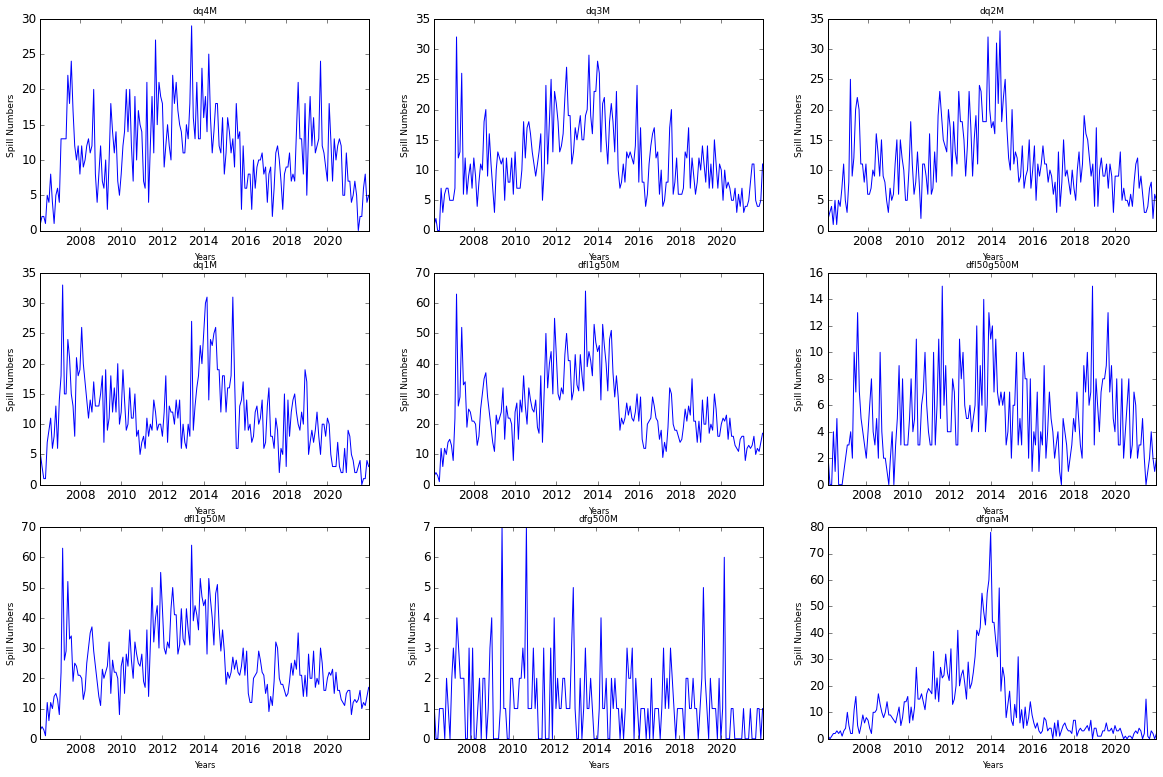

In [114]:
plt.figure(figsize = (20,5))
plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


plt.subplot(3,3,1)
plt.plot(dq4M['incidentdate'], dq4M['spillno'] )
plt.title('dq4M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,3,2)
plt.plot(dq3M['incidentdate'], dq3M['spillno'] )
plt.title('dq3M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,3,3)
plt.plot(dq2M['incidentdate'], dq2M['spillno'] )
plt.title('dq2M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,3,4)
plt.plot(dq1M['incidentdate'], dq1M['spillno'] )
plt.title('dq1M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,3,5)
plt.plot(dfl1g50M['incidentdate'], dfl1g50M['spillno'] )
plt.title('dfl1g50M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,3,6)
plt.plot(dfl50g500M['incidentdate'], dfl50g500M['spillno'] )
plt.title('dfl50g500M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,3,7)
plt.plot(dfl1g50M['incidentdate'], dfl1g50M['spillno'] )
plt.title('dfl1g50M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

plt.subplot(3,3,8)
plt.plot(dfg500M['incidentdate'], dfg500M['spillno'] )
plt.title('dfg500M', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12


plt.subplot(3,3,9)
plt.plot(dfgnaM['incidentdate'], dfgnaM['spillno'] )
plt.title('dfgnaM', fontsize = 9)
plt.xlabel('Years', fontsize = 8)
plt.ylabel('Spill Numbers', fontsize = 9)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

